In [3]:
"""Import required libs"""
import numpy as np
import cv2 as cv
from scipy import misc
i = misc.ascent()


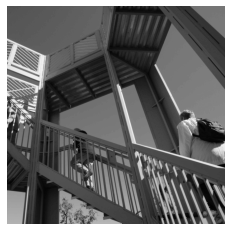

In [4]:
"""prepare plt"""
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [6]:
"""transform image and get shape"""
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [32]:
"""create filter array"""
filter_0 = [[0, 1 ,0],[1, -4, 1],[0, 1 ,0]]
filter_1 = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter_c0 = [[-1,0,1],[-2,0,2],[-1,0,1]]
filter_c1 = [[1,2,1],[0,0,0],[-1,-2,-1]]

weight =1 

In [38]:
"""Manual convolution, iterate over image, 1 pixel image margin"""
for x in range(1, size_x-1):
    for y in range(1,size_y-1):
        convolution=0.0
        convolution=convolution+(i[x - 1, y-1] * filter_1[0][0])
        convolution=convolution+(i[x, y-1] * filter_1[1][0])
        convolution=convolution+(i[x + 1, y-1] * filter_1[2][0])
        convolution=convolution+(i[x-1, y] * filter_1[0][1])
        convolution=convolution+(i[x, y] * filter_1[1][1])
        convolution=convolution+(i[x+1, y] * filter_1[2][1])
        convolution=convolution+(i[x-1, y+1] * filter_1[0][2])
        convolution=convolution+(i[x, y+1] * filter_1[1][2])
        convolution=convolution+(i[x+1, y+1] * filter_1[2][2])
        convolution=convolution * weight

        if(convolution<0):
            convolution = 0
        if(convolution>255):
            convolution = 255
        
        i_transformed[x,y] = convolution



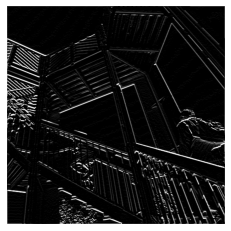

In [34]:
"""plot processed image"""
plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(i_transformed)
plt.show()

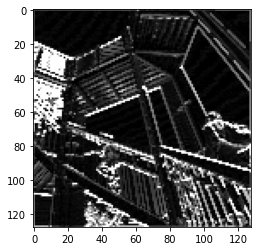

In [37]:
"""manual pooling, 4x4 pool"""
new_x = int(size_x/4)
new_y = int(size_y/4)
new_image = np.zeros((new_x,new_y))

for x in range (0, size_x,4):
    for y in range(0, size_y,4):
        pixels = []
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x+2, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        pixels.append(i_transformed[x+2, y+1])
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+3, y+1])
        pixels.append(i_transformed[x+3, y])
        pixels.append(i_transformed[x, y+2])
        pixels.append(i_transformed[x+1, y+2])
        pixels.append(i_transformed[x+2, y+2])
        pixels.append(i_transformed[x+3, y+2])
        pixels.append(i_transformed[x, y+3])
        pixels.append(i_transformed[x+1, y+3])
        pixels.append(i_transformed[x+2, y+3])
        pixels.append(i_transformed[x+3, y+3])
        pixels.sort(reverse=True)
        new_image[int(x/4),int(y/4)] = pixels[0]

"""plot after pooling"""
plt.gray()
plt.grid(False)
plt.imshow(new_image)
plt.show()